In [3]:
import pandas as pd

In [4]:
url = "https://www.football-data.co.uk/new/POL.csv"
df = pd.read_csv(url)

df.head()


,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Poland,Ekstraklasa,2012/2013,17/08/2012,17:00,Pogon Szczecin,Zaglebie,4,0,H,3.23,3.21,2.47,3.30,3.30,2.50,3.01,3.11,2.34
1,Poland,Ekstraklasa,2012/2013,17/08/2012,19:30,Piast Gliwice,Gornik Z.,1,2,A,2.72,3.12,2.98,2.78,3.25,3.30,2.56,3.05,2.78
2,Poland,Ekstraklasa,2012/2013,18/08/2012,12:30,Jagiellonia,Podbeskidzie,2,1,H,1.74,3.60,5.63,1.85,3.60,5.63,1.74,3.42,4.72
3,Poland,Ekstraklasa,2012/2013,18/08/2012,14:45,Widzew Lodz,Slask Wroclaw,2,1,H,2.70,3.11,2.95,2.80,3.20,2.95,2.66,3.03,2.66
4,Poland,Ekstraklasa,2012/2013,18/08/2012,17:00,Lech Poznan,Ruch,4,0,H,2.12,3.29,3.89,2.12,3.30,4.00,2.05,3.16,3.61


In [6]:
df_2324 = df[df['Season'] == '2023/2024'][['Home', 'Away', 'HG', 'AG', 'Date']]

In [20]:
df_2324_json = df_2324.to_json(orient='records')


In [24]:
df_2324_json

'[{"Home":"Warta Poznan","Away":"Pogon Szczecin","HG":0,"AG":1,"Date":"21\\/07\\/2023"},{"Home":"Legia","Away":"LKS Lodz","HG":3,"AG":0,"Date":"21\\/07\\/2023"},{"Home":"Stal Mielec","Away":"Cracovia","HG":2,"AG":2,"Date":"22\\/07\\/2023"},{"Home":"Rakow","Away":"Jagiellonia","HG":3,"AG":0,"Date":"22\\/07\\/2023"},{"Home":"Piast Gliwice","Away":"Lech Poznan","HG":1,"AG":2,"Date":"22\\/07\\/2023"},{"Home":"Gornik Zabrze","Away":"Radomiak Radom","HG":0,"AG":2,"Date":"23\\/07\\/2023"},{"Home":"Zaglebie","Away":"Ruch Chorzow","HG":2,"AG":1,"Date":"23\\/07\\/2023"},{"Home":"Widzew Lodz","Away":"Puszcza","HG":3,"AG":2,"Date":"23\\/07\\/2023"},{"Home":"Korona Kielce","Away":"Slask Wroclaw","HG":1,"AG":1,"Date":"24\\/07\\/2023"},{"Home":"Ruch Chorzow","Away":"LKS Lodz","HG":2,"AG":0,"Date":"28\\/07\\/2023"},{"Home":"Warta Poznan","Away":"Gornik Zabrze","HG":2,"AG":0,"Date":"29\\/07\\/2023"},{"Home":"Jagiellonia","Away":"Puszcza","HG":4,"AG":1,"Date":"29\\/07\\/2023"},{"Home":"Slask Wroclaw","A

In [23]:
df_2324_json[0:3]

'[{"'

In [27]:
import json

data = json.loads(df_2324_json)

data


[{'Home': 'Warta Poznan',
  'Away': 'Pogon Szczecin',
  'HG': 0,
  'AG': 1,
  'Date': '21/07/2023'},
 {'Home': 'Legia', 'Away': 'LKS Lodz', 'HG': 3, 'AG': 0, 'Date': '21/07/2023'},
 {'Home': 'Stal Mielec',
  'Away': 'Cracovia',
  'HG': 2,
  'AG': 2,
  'Date': '22/07/2023'},
 {'Home': 'Rakow',
  'Away': 'Jagiellonia',
  'HG': 3,
  'AG': 0,
  'Date': '22/07/2023'},
 {'Home': 'Piast Gliwice',
  'Away': 'Lech Poznan',
  'HG': 1,
  'AG': 2,
  'Date': '22/07/2023'},
 {'Home': 'Gornik Zabrze',
  'Away': 'Radomiak Radom',
  'HG': 0,
  'AG': 2,
  'Date': '23/07/2023'},
 {'Home': 'Zaglebie',
  'Away': 'Ruch Chorzow',
  'HG': 2,
  'AG': 1,
  'Date': '23/07/2023'},
 {'Home': 'Widzew Lodz',
  'Away': 'Puszcza',
  'HG': 3,
  'AG': 2,
  'Date': '23/07/2023'},
 {'Home': 'Korona Kielce',
  'Away': 'Slask Wroclaw',
  'HG': 1,
  'AG': 1,
  'Date': '24/07/2023'},
 {'Home': 'Ruch Chorzow',
  'Away': 'LKS Lodz',
  'HG': 2,
  'AG': 0,
  'Date': '28/07/2023'},
 {'Home': 'Warta Poznan',
  'Away': 'Gornik Zabrz

In [7]:
import mezzala

In [28]:
adapter = mezzala.KeyAdapter(
    home_team = 'Home',
    away_team = 'Away',
    home_goals = 'HG',
    away_goals='AG'
)

adapter.home_team(data[0])

'Warta Poznan'

In [29]:
model = mezzala.DixonColes(adapter=adapter)
model.fit(data)

DixonColes(adapter=KeyAdapter(home_goals='HG', away_goals='AG', home_team='Home', away_team='Away'), blocks=[TeamStrength(), BaseRate(), HomeAdvantage()]), weight=UniformWeight()

In [31]:
match_to_predict = {
    'Home': 'Radomiak Radom',
    'Away': 'Lech Poznan',
}

scorelines = model.predict_one(match_to_predict)

mezzala.scorelines_to_outcomes(scorelines)

{Outcomes('Home win'): OutcomePrediction(outcome=Outcomes('Home win'), probability=0.36883950774004104),
 Outcomes('Draw'): OutcomePrediction(outcome=Outcomes('Draw'), probability=0.28797986895074096),
 Outcomes('Away win'): OutcomePrediction(outcome=Outcomes('Away win'), probability=0.3431806233092176)}

In [34]:
filtered_scorelines = [scoreline for scoreline in scorelines if scoreline.home_goals <= 5 and scoreline.away_goals <= 5]
filtered_scorelines


[ScorelinePrediction(home_goals=0, away_goals=0, probability=0.0858028742024197),
 ScorelinePrediction(home_goals=0, away_goals=1, probability=0.08132387123431556),
 ScorelinePrediction(home_goals=0, away_goals=2, probability=0.05997461560933537),
 ScorelinePrediction(home_goals=0, away_goals=3, probability=0.025567326199766146),
 ScorelinePrediction(home_goals=0, away_goals=4, probability=0.008174560549874102),
 ScorelinePrediction(home_goals=0, away_goals=5, probability=0.0020909011653840962),
 ScorelinePrediction(home_goals=1, away_goals=0, probability=0.08534887410560074),
 ScorelinePrediction(home_goals=1, away_goals=1, probability=0.13756336301601796),
 ScorelinePrediction(home_goals=1, away_goals=2, probability=0.07999363417895838),
 ScorelinePrediction(home_goals=1, away_goals=3, probability=0.03410148307211228),
 ScorelinePrediction(home_goals=1, away_goals=4, probability=0.010903159604387504),
 ScorelinePrediction(home_goals=1, away_goals=5, probability=0.0027888262597227623)

In [41]:
sorted_scorelines = sorted(filtered_scorelines, key=lambda x: x.probability, reverse=True)
sorted_scorelines


[ScorelinePrediction(home_goals=1, away_goals=1, probability=0.13756336301601796),
 ScorelinePrediction(home_goals=0, away_goals=0, probability=0.0858028742024197),
 ScorelinePrediction(home_goals=1, away_goals=0, probability=0.08534887410560074),
 ScorelinePrediction(home_goals=2, away_goals=1, probability=0.0834265507358834),
 ScorelinePrediction(home_goals=0, away_goals=1, probability=0.08132387123431556),
 ScorelinePrediction(home_goals=1, away_goals=2, probability=0.07999363417895838),
 ScorelinePrediction(home_goals=2, away_goals=0, probability=0.0652326759148699),
 ScorelinePrediction(home_goals=0, away_goals=2, probability=0.05997461560933537),
 ScorelinePrediction(home_goals=2, away_goals=2, probability=0.05334741577035618),
 ScorelinePrediction(home_goals=3, away_goals=1, probability=0.0370912088532546),
 ScorelinePrediction(home_goals=1, away_goals=3, probability=0.03410148307211228),
 ScorelinePrediction(home_goals=3, away_goals=0, probability=0.029002263488935195),
 Scorel

In [50]:
import numpy as np

array_5x5 = np.zeros((6, 6))

for scoreline in filtered_scorelines:
    home_goals = scoreline.home_goals
    away_goals = scoreline.away_goals
    probability = scoreline.probability
    array_5x5[home_goals, away_goals] = probability

array_5x5


array([[8.58028742e-02, 8.13238712e-02, 5.99746156e-02, 2.55673262e-02,
        8.17456055e-03, 2.09090117e-03],
       [8.53488741e-02, 1.37563363e-01, 7.99936342e-02, 3.41014831e-02,
        1.09031596e-02, 2.78882626e-03],
       [6.52326759e-02, 8.34265507e-02, 5.33474158e-02, 2.27421346e-02,
        7.27127095e-03, 1.85985642e-03],
       [2.90022635e-02, 3.70912089e-02, 2.37181104e-02, 1.01110888e-02,
        3.23278653e-03, 8.26886911e-04],
       [9.67074333e-03, 1.23679850e-02, 7.90875367e-03, 3.37152115e-03,
        1.07796582e-03, 2.75723689e-04],
       [2.57975110e-03, 3.29926273e-03, 2.10972573e-03, 8.99381269e-04,
        2.87556336e-04, 7.35515841e-05]])

In [58]:
array_5x5 = np.round(array_5x5 * 100, decimals=2)
array_5x5


array([[ 8.6,  8.1,  6. ,  2.6,  0.8,  0.2],
       [ 8.5, 13.8,  8. ,  3.4,  1.1,  0.3],
       [ 6.5,  8.3,  5.3,  2.3,  0.7,  0.2],
       [ 2.9,  3.7,  2.4,  1. ,  0.3,  0.1],
       [ 1. ,  1.2,  0.8,  0.3,  0.1,  0. ],
       [ 0.3,  0.3,  0.2,  0.1,  0. ,  0. ]])

In [39]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl


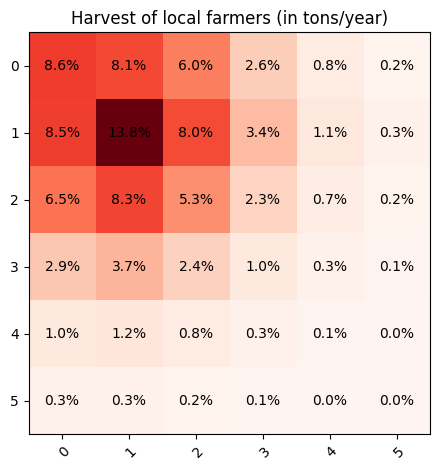

In [59]:
home_goals = np.arange(0, 6)
away_goals = np.arange(0, 6)

fig, ax = plt.subplots()
im = ax.imshow(array_5x5, cmap='Reds')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(home_goals)), labels=home_goals)
ax.set_yticks(np.arange(len(away_goals)), labels=away_goals)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(home_goals)):
    for j in range(len(away_goals)):
        text = ax.text(j, i, f"{array_5x5[i, j]}%",
                       ha="center", va="center", color="black")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
